In [ ]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

## An analysis of the 2020 Kaggle ML and DS Survey for the adoption of Automated Machine Learning in the industry

![](https://image.freepik.com/free-vector/dashboard-consolidating-metrics-computer-screen-business-intelligence-dashboard-business-analytics-tool-business-intelligence-metrics-concept_335657-1890.jpg)

<a href="https://www.freepik.com/vectors/computer">Computer vector created by vectorjuice - www.freepik.com</a>

>  ### *AI and machine learning is still a field with high barriers to entry that requires expertise and resources that few companies can afford on their own: Fei-Fei Li*


Artificial Intelligence(AI) has the potential to make a big difference in every facet of our lives, especially in areas like healthcare, education, and environmental conservation. However, many enterprises still struggle to deploy machine learning solutions effectively. It is primarily due to the issues of talent, time, and trust, which is prevalent in many businesses.

![](https://cdn-images-1.medium.com/max/800/1*ykOYaXTmv8Mrb8uYYESMfA.png)


* The traditional machine learning(ML) process heavily relies on human expertise. As a result, before starting on the ML journey, a company needs to invest in expert data scientists, researchers, and mathematicians. Unfortunately, there is a considerable **talent gap** with an [acute shortage of experienced and seasoned data scientists in the industry today](http://https://www.theverge.com/2017/12/5/16737224/global-ai-talent-shortfall-tencent-report). 
* Secondly, **time** is of the essence here. When machine learning solutions drive business decisions, it is crucial to get the results quickly. Some of the current ML solutions take months to deploy, which affects their outcomes. Also, due to the heavy manual dependence, there are chances of errors creeping in the workflow. 
* Finally, it is imperative to tackle the issue of **trust**. A lot of companies fail to translate model predictions into understandable terms for stakeholders. Although there are systems in place for interpretability and explainability in conventional ML systems, lack of knowledge and experience makes the implementation hard.


AutoML is an effort towards democratizing machine learning by making its power available to everybody, rather than a select few. AutoML enables people with diverse skillsets to work on ML problems. By automating the repetitive tasks, it allows data scientists to focus on essential aspects of ML pipeline like data gathering and model deployment. 

## Motivation and Methodology

This notebook is a deep dive into the current AutoML solutions and preactises. The idea is to:
* Utilise the Kaggle survey data to see how the AutoML solutions have penetrated the AI ecosystem and what the future holds for this industry. 
* Secondly, I work as a Data Science Evangelist for H2O.ai - An AutoML company,Hence, this analysis will be a way for me to understand how Kagglers' particlularly engage with AutoML tools. 

In this notebook, we shall analyze the AutoML usage and adoption in the survey under six different categories, namely:
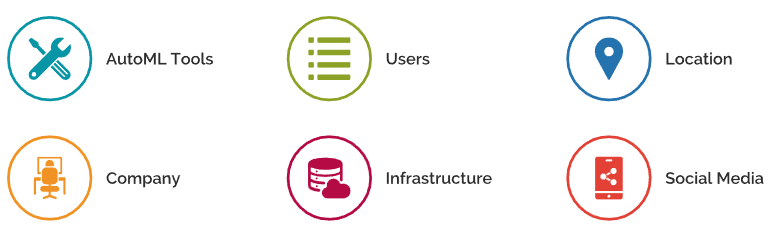
*****




# <div align="center">Automated Machine Learning</div>

## Introduction

Automated Machine Learning, also known as AutoML, is the process of automating the end to end process of applying machine learning to real-world problems. A typical machine learning process consists of several steps, including ingesting and preprocessing data, feature engineering, model training, and deployment. In conventional machine learning, every step in this pipeline is monitored and executed by humans. [Tools for automatic machine learning (AutoML) aims to automate one or more stages of these machine learning pipelines](https://arxiv.org/abs/2002.04803) making it easier for non-experts to build machine learning models while removing repetitive tasks and enabling seasoned
machine learning engineers to build better models faster.

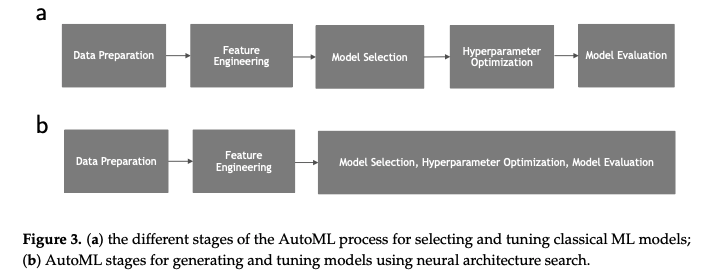
###### source: [Machine Learning in Python: Main developments and technology trends in data science, machine learning, and artificial intelligence](https://arxiv.org/abs/2002.04803)


## Background and History

AutoML solutions have been around for quite some time now. The early AutoML solutions like [AutoWeka](https://www.cs.ubc.ca/labs/beta/Projects/autoweka/) [originated in academia](https://arxiv.org/pdf/1908.05557.pdf) in 2013, followed by [Auto-sklearn](https://automl.github.io/auto-sklearn/master/) and [TPOT](http://automl.info/tpot/). This triggered a new wave of machine learning and the coming years saw many other AutoML solutions including [Auto-ml](https://github.com/ClimbsRocks/auto_ml), and [Auto-Keras](https://autokeras.com/) hitting the market. Simultaneously startups like [H2O.ai](https://www.h2o.ai/) and [DataRobot](https://www.datarobot.com/) came out with their own versions of automated solutions. More recently, companies like [Amazon](https://aws.amazon.com/sagemaker/autopilot/), [Google](https://cloud.google.com/automl), and [Microsoft](https://azure.microsoft.com/en-us/services/machine-learning/automatedml/) have also joined the bandwagon.

Some of the solutions like AutoWeka, Auto-Sklearn, TPOT, H2OAutoML are fully open-sourced while DataRobot, Amazon Sagemaker, Google’s AutoML, and DriverlessAI are enterprise-based. There are some other automl solutions also like Uber’s [Ludwig](https://uber.github.io/ludwig/) and Saleforces’s [TransmogrifAI](https://docs.transmogrif.ai/en/stable/), which are also open-source. This isn’t an exhaustive list but covers the ones that are being used commonly today.





In [ ]:
# import the necessary libraries
import numpy as np 
import pandas as pd 
from datetime import datetime

# Visualisation libraries
#matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')

#Plotly
from plotly.offline import init_notebook_mode, iplot 
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.offline as py
import pycountry
py.init_notebook_mode(connected=True)

#Folium
import folium 
from folium import plugins


# Graphics in retina format 
%config InlineBackend.figure_format = 'retina' 


#Disable warnings
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
names = ['AutoWeka', 'Auto-sklearn', ' TPOT', 'Auto-ml', 'Auto-Keras', 
        ' Datarobot', ' H2O-Automl', 'H2O-DriverlessAI', 'Darwin', 'Google Cloud Automl', 
        'Microsoft AzureML', ' TransmogrifAI' ,'Ludwig','MLjar']
dates = ['2013', '2014', '2015', '2016','2017', '2015', '2016',
        '2017', '2018', '2017', '2018', '2018' ,'2019','2018']
 
# Convert date strings (e.g. 2014-10-18) to datetime
dates = [datetime.strptime(d, "%Y") for d in dates]
#dates = [d.year for d in dates]
 
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

 
# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(10, 6), constrained_layout=True)
ax.set(title="AutoML Tools history")
markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)
plt.setp(markerline, mec="k", mfc="w", zorder=3)
 
# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))
 
# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(-3, np.sign(l)*3),
                textcoords="offset points", va=va, ha="left")
# format xaxis 
#ax.get_xaxis().set_major_locator(mdates.YearLocator())
#ax.get_xaxis().set_major_formatter(mdates.DateFormatter("%b %Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
 
# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(True)
ax.margins(y=0.1)

plt.show()

print('This timeline chart has been created with Matplotlib 😃')

# <a> An Overview of the Respondents</a> 
Let's begin by analyzing the 2020 survey's dataset to get a big picture.We shall begin by importing the dataset and the necessary libraries for the analysis. 

## <a> Total number of Survey respondents</a> 
Let's first look at the total respondents who participated in the survey. 


In [ ]:
# Importing the 2017,2018 and 2019 and 2020 survey dataset

#Importing the 2020 Dataset
df_2020 = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv",low_memory=False)
#df_2020.columns = df_2020.iloc[0]
#df_2020=df_2020.drop([0])

#Importing the 2019 Dataset
df_2019 = pd.read_csv('../input/kaggle-survey-2019/multiple_choice_responses.csv',low_memory=False)
#df_2019.columns = df_2019.iloc[0]
#df_2019=df_2019.drop([0])

#Importing the 2018 Dataset
df_2018 = pd.read_csv('../input/kaggle-survey-2018/multipleChoiceResponses.csv',low_memory=False)
#df_2018.columns = df_2018.iloc[0]
#df_2018=df_2018.drop([0])

#Importing the 2017 Dataset
df_2017=pd.read_csv('../input/kaggle-survey-2017/multipleChoiceResponses.csv',encoding='ISO-8859-1',low_memory=False)



# Helper functions( Source: https://www.kaggle.com/paultimothymooney/2020-kaggle-data-science-machine-learning-survey?select=kaggle_survey_2020_responses.csv)


def count_then_return_percent(dataframe,column_name):
    '''
    A helper function to return value counts as percentages.
    
    '''
    counts = dataframe[column_name].value_counts(dropna=False)
    percentages = round(counts*100/(dataframe[column_name].count()),1)
    return percentages

def count_then_return_percent_for_multiple_column_questions(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question):
    '''
    A helper function to convert counts to percentages.
    
    '''
    
    df = dataframe
    subset = list_of_columns_for_a_single_question
    df = df[subset]
    df = df.dropna(how='all')
    total_count = len(df) 
    dictionary = dictionary_of_counts_for_a_single_question
    for i in dictionary:
        dictionary[i] = round(float(dictionary[i]*100/total_count),1)
    return dictionary 

def create_dataframe_of_counts(dataframe,column,rename_index,rename_column,return_percentages=False):
    '''
    A helper function to create a dataframe of either counts 
    or percentages, for a single multiple choice question.
     
    '''
    df = dataframe[column].value_counts().reset_index() 
    if return_percentages==True:
        df[column] = (df[column]*100)/(df[column].sum())
    df = pd.DataFrame(df) 
    df = df.rename({'index':rename_index, 'Q3':rename_column}, axis='columns')
    return df

def sort_dictionary_by_percent(dataframe,list_of_columns_for_a_single_question,dictionary_of_counts_for_a_single_question): 
    ''' 
    A helper function that can be used to sort a dictionary.
    
    It is an adaptation of a similar function
    from https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science.
    
    '''
    dictionary = count_then_return_percent_for_multiple_column_questions(dataframe,
                                                                list_of_columns_for_a_single_question,
                                                                dictionary_of_counts_for_a_single_question)
    dictionary = {v:k    for(k,v) in dictionary.items()}
    list_tuples = sorted(dictionary.items(), reverse=False) 
    dictionary = {v:k for (k,v) in list_tuples}   
    return dictionary

In [ ]:
# https://www.kaggle.com/paultimothymooney/2020-kaggle-data-science-machine-learning-survey?select=kaggle_survey_2020_responses.csv

# lists of answer choices and dictionaries of value counts (for the multiple choice multiple selection questions)

# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These dictionaries contain value counts for every answer choice for every multiple-column question.

responses_df = df_2020


q23_dictionary_of_counts = {
    'Analyze and understand data to influence product or business decisions' : (responses_df['Q23_Part_1'].count()),
    'Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data': (responses_df['Q23_Part_2'].count()),
    'Build prototypes to explore applying machine learning to new areas' : (responses_df['Q23_Part_3'].count()),
    'Build and/or run a machine learning service that operationally improves my product or workflows' : (responses_df['Q23_Part_4'].count()),
    'Experimentation and iteration to improve existing ML models' : (responses_df['Q23_Part_5'].count()),
    'Do research that advances the state of the art of machine learning' : (responses_df['Q23_Part_6'].count()),
    'None of these activities are an important part of my role at work' : (responses_df['Q23_Part_7'].count()),
    'Other' : (responses_df['Q23_OTHER'].count())
}


q26a_dictionary_of_counts = {
    'Amazon Web Services (AWS)' : (responses_df['Q26_A_Part_1'].count()),
    'Microsoft Azure': (responses_df['Q26_A_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df['Q26_A_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df['Q26_A_Part_4'].count()),
    'Oracle Cloud' : (responses_df['Q26_A_Part_5'].count()),
    'SAP Cloud' : (responses_df['Q26_A_Part_6'].count()),
    'Salesforce Cloud' : (responses_df['Q26_A_Part_7'].count()),
    'VMware Cloud' : (responses_df['Q26_A_Part_8'].count()),
    'Alibaba Cloud' : (responses_df['Q26_A_Part_9'].count()),
    'Tencent Cloud' : (responses_df['Q26_A_Part_10'].count()),
    'None' : (responses_df['Q26_A_Part_11'].count()),
    'Other' : (responses_df['Q26_A_OTHER'].count())
}

q26b_dictionary_of_counts = {
    'Amazon Web Services (AWS)' : (responses_df['Q26_B_Part_1'].count()),
    'Microsoft Azure': (responses_df['Q26_B_Part_2'].count()),
    'Google Cloud Platform (GCP)' : (responses_df['Q26_B_Part_3'].count()),
    'IBM Cloud / Red Hat' : (responses_df['Q26_B_Part_4'].count()),
    'Oracle Cloud' : (responses_df['Q26_B_Part_5'].count()),
    'SAP Cloud' : (responses_df['Q26_B_Part_6'].count()),
    'Salesforce Cloud' : (responses_df['Q26_B_Part_7'].count()),
    'VMware Cloud' : (responses_df['Q26_B_Part_8'].count()),
    'Alibaba Cloud' : (responses_df['Q26_B_Part_9'].count()),
    'Tencent Cloud' : (responses_df['Q26_B_Part_10'].count()),
    'None' : (responses_df['Q26_B_Part_11'].count()),
    'Other' : (responses_df['Q26_B_OTHER'].count())
}

q27a_dictionary_of_counts = {
    'Amazon EC2' : (responses_df['Q27_A_Part_1'].count()),
    'AWS Lambda': (responses_df['Q27_A_Part_2'].count()),
    'Amazon Elastic Container Service' : (responses_df['Q27_A_Part_3'].count()),
    'Azure Cloud Services' : (responses_df['Q27_A_Part_4'].count()),
    'Microsoft Azure Container Instances' : (responses_df['Q27_A_Part_5'].count()),
    'Azure Functions' : (responses_df['Q27_A_Part_6'].count()),
    'Google Cloud Compute Engine' : (responses_df['Q27_A_Part_7'].count()),
    'Google Cloud Functions' : (responses_df['Q27_A_Part_8'].count()),
    'Google Cloud Run' : (responses_df['Q27_A_Part_9'].count()),
    'Google Cloud App Engine' : (responses_df['Q27_A_Part_10'].count()),
    'No / None' : (responses_df['Q27_A_Part_11'].count()),
    'Other' : (responses_df['Q27_A_OTHER'].count())
}

q27b_dictionary_of_counts = {
    'Amazon EC2' : (responses_df['Q27_B_Part_1'].count()),
    'AWS Lambda': (responses_df['Q27_B_Part_2'].count()),
    'Amazon Elastic Container Service' : (responses_df['Q27_B_Part_3'].count()),
    'Azure Cloud Services' : (responses_df['Q27_B_Part_4'].count()),
    'Microsoft Azure Container Instances' : (responses_df['Q27_B_Part_5'].count()),
    'Azure Functions' : (responses_df['Q27_B_Part_6'].count()),
    'Google Cloud Compute Engine' : (responses_df['Q27_B_Part_7'].count()),
    'Google Cloud Functions' : (responses_df['Q27_B_Part_8'].count()),
    'Google Cloud Run' : (responses_df['Q27_B_Part_9'].count()),
    'Google Cloud App Engine' : (responses_df['Q27_B_Part_10'].count()),
    'No / None' : (responses_df['Q27_B_Part_11'].count()),
    'Other' : (responses_df['Q27_B_OTHER'].count())
}

q28a_dictionary_of_counts = {
    'Amazon SageMaker' : (responses_df['Q28_A_Part_1'].count()),
    'Amazon Forecast': (responses_df['Q28_A_Part_2'].count()),
    'Amazon Rekognition' : (responses_df['Q28_A_Part_3'].count()),
    'Azure Machine Learning Studio' : (responses_df['Q28_A_Part_4'].count()),
    'Azure Cognitive Services' : (responses_df['Q28_A_Part_5'].count()),
    'Google Cloud AI Platform / Google Cloud ML Engine' : (responses_df['Q28_A_Part_6'].count()),
    'Google Cloud Video AI' : (responses_df['Q28_A_Part_7'].count()),
    'Google Cloud Natural Language' : (responses_df['Q28_A_Part_8'].count()),
    'Google Cloud Vision AI' : (responses_df['Q28_A_Part_9'].count()),
    'No / None' : (responses_df['Q28_A_Part_10'].count()),
    'Other' : (responses_df['Q28_A_OTHER'].count())
}

q28b_dictionary_of_counts = {
    'Amazon SageMaker' : (responses_df['Q28_B_Part_1'].count()),
    'Amazon Forecast': (responses_df['Q28_B_Part_2'].count()),
    'Amazon Rekognition' : (responses_df['Q28_B_Part_3'].count()),
    'Azure Machine Learning Studio' : (responses_df['Q28_B_Part_4'].count()),
    'Azure Cognitive Services' : (responses_df['Q28_B_Part_5'].count()),
    'Google Cloud AI Platform / Google Cloud ML Engine' : (responses_df['Q28_B_Part_6'].count()),
    'Google Cloud Video AI' : (responses_df['Q28_B_Part_7'].count()),
    'Google Cloud Natural Language' : (responses_df['Q28_B_Part_8'].count()),
    'Google Cloud Vision AI' : (responses_df['Q28_B_Part_9'].count()),
    'No / None' : (responses_df['Q28_B_Part_10'].count()),
    'Other' : (responses_df['Q28_B_OTHER'].count())
}




q33a_dictionary_of_counts = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (responses_df['Q33_A_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (responses_df['Q33_A_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (responses_df['Q33_A_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (responses_df['Q33_A_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (responses_df['Q33_A_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (responses_df['Q33_A_Part_6'].count()),
    'No / None' : (responses_df['Q33_A_Part_7'].count()),
    'Other' : (responses_df['Q33_A_OTHER'].count())
}

q33b_dictionary_of_counts = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (responses_df['Q33_B_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (responses_df['Q33_B_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (responses_df['Q33_B_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (responses_df['Q33_B_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (responses_df['Q33_B_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (responses_df['Q33_B_Part_6'].count()),
    'No / None' : (responses_df['Q33_B_Part_7'].count()),
    'Other' : (responses_df['Q33_B_OTHER'].count())
}

q34a_dictionary_of_counts = {
    'Google Cloud AutoML' : (responses_df['Q34_A_Part_1'].count()),
    'H20 Driverless AI': (responses_df['Q34_A_Part_2'].count()),
    'Databricks AutoML' : (responses_df['Q34_A_Part_3'].count()),
    'DataRobot AutoML' : (responses_df['Q34_A_Part_4'].count()),
    'Tpot' : (responses_df['Q34_A_Part_5'].count()),
    'Auto-Keras' : (responses_df['Q34_A_Part_6'].count()),
    'Auto-Sklearn' : (responses_df['Q34_A_Part_7'].count()),
    'Auto_ml' : (responses_df['Q34_A_Part_8'].count()),
    'Xcessiv' : (responses_df['Q34_A_Part_9'].count()),
    'MLbox' : (responses_df['Q34_A_Part_10'].count()),
    'No / None' : (responses_df['Q34_A_Part_11'].count()),
    'Other' : (responses_df['Q34_A_OTHER'].count())
}

q34b_dictionary_of_counts = {
    'Google Cloud AutoML' : (responses_df['Q34_B_Part_1'].count()),
    'H20 Driverless AI': (responses_df['Q34_B_Part_2'].count()),
    'Databricks AutoML' : (responses_df['Q34_B_Part_3'].count()),
    'DataRobot AutoML' : (responses_df['Q34_B_Part_4'].count()),
    'Tpot' : (responses_df['Q34_B_Part_5'].count()),
    'Auto-Keras' : (responses_df['Q34_B_Part_6'].count()),
    'Auto-Sklearn' : (responses_df['Q34_B_Part_7'].count()),
    'Auto_ml' : (responses_df['Q34_B_Part_8'].count()),
    'Xcessiv' : (responses_df['Q34_B_Part_9'].count()),
    'MLbox' : (responses_df['Q34_B_Part_10'].count()),
    'No / None' : (responses_df['Q34_B_Part_11'].count()),
    'Other' : (responses_df['Q34_B_OTHER'].count())
}


# Questions where respondents can select more than one answer choice have been split into multiple columns.
# These lists delineate every sub-column for every multiple-column question.



q23_list_of_columns = ['Q23_Part_1',
                       'Q23_Part_2',
                       'Q23_Part_3',
                       'Q23_Part_4',
                       'Q23_Part_5',
                       'Q23_Part_6',
                       'Q23_Part_7',
                       'Q23_OTHER']

q26a_list_of_columns = ['Q26_A_Part_1',
                        'Q26_A_Part_2',
                        'Q26_A_Part_3',
                        'Q26_A_Part_4',
                        'Q26_A_Part_5',
                        'Q26_A_Part_6',
                        'Q26_A_Part_7',
                        'Q26_A_Part_8',
                        'Q26_A_Part_9',
                        'Q26_A_Part_10',
                        'Q26_A_Part_11',
                        'Q26_A_OTHER']

q26b_list_of_columns = ['Q26_B_Part_1',
                        'Q26_B_Part_2',
                        'Q26_B_Part_3',
                        'Q26_B_Part_4',
                        'Q26_B_Part_5',
                        'Q26_B_Part_6',
                        'Q26_B_Part_7',
                        'Q26_B_Part_8',
                        'Q26_B_Part_9',
                        'Q26_B_Part_10',
                        'Q26_B_Part_11',
                        'Q26_B_OTHER']

q27a_list_of_columns = ['Q27_A_Part_1',
                        'Q27_A_Part_2',
                        'Q27_A_Part_3',
                        'Q27_A_Part_4',
                        'Q27_A_Part_5',
                        'Q27_A_Part_6',
                        'Q27_A_Part_7',
                        'Q27_A_Part_8',
                        'Q27_A_Part_9',
                        'Q27_A_Part_10',
                        'Q27_A_Part_11',
                        'Q27_A_OTHER']

q27b_dictionary_of_counts = ['Q27_B_Part_1',
                             'Q27_B_Part_2',
                             'Q27_B_Part_3',
                             'Q27_B_Part_4',
                             'Q27_B_Part_5',
                             'Q27_B_Part_6',
                             'Q27_B_Part_7',
                             'Q27_B_Part_8',
                             'Q27_B_Part_9',
                             'Q27_B_Part_10',
                             'Q27_B_Part_11',
                             'Q27_B_OTHER']

q28a_list_of_columns = ['Q28_A_Part_1',
                        'Q28_A_Part_2',
                        'Q28_A_Part_3',
                        'Q28_A_Part_4',
                        'Q28_A_Part_5',
                        'Q28_A_Part_6',
                        'Q28_A_Part_7',
                        'Q28_A_Part_8',
                        'Q28_A_Part_9',
                        'Q28_A_Part_10',
                        'Q28_A_OTHER']

q28b_list_of_columns = ['Q28_B_Part_1',
                        'Q28_B_Part_2',
                        'Q28_B_Part_3',
                        'Q28_B_Part_4',
                        'Q28_B_Part_5',
                        'Q28_B_Part_6',
                        'Q28_B_Part_7',
                        'Q28_B_Part_8',
                        'Q28_B_Part_9',
                        'Q28_B_Part_10',
                        'Q28_B_OTHER']



q33a_list_of_columns = ['Q33_A_Part_1',
                        'Q33_A_Part_2',
                        'Q33_A_Part_3',
                        'Q33_A_Part_4',
                        'Q33_A_Part_5',
                        'Q33_A_Part_6',
                        'Q33_A_Part_7',
                        'Q33_A_OTHER']

q33b_list_of_columns = ['Q33_B_Part_1',
                        'Q33_B_Part_2',
                        'Q33_B_Part_3',
                        'Q33_B_Part_4',
                        'Q33_B_Part_5',
                        'Q33_B_Part_6',
                        'Q33_B_Part_7',
                        'Q33_B_OTHER']

q34a_list_of_columns = ['Q34_A_Part_1',
                        'Q34_A_Part_2',
                        'Q34_A_Part_3',
                        'Q34_A_Part_4',
                        'Q34_A_Part_5',
                        'Q34_A_Part_6',
                        'Q34_A_Part_7',
                        'Q34_A_Part_8',
                        'Q34_A_Part_9',
                        'Q34_A_Part_10',
                        'Q34_A_Part_11',
                        'Q34_A_OTHER']

q34b_list_of_columns = ['Q34_B_Part_1',
                        'Q34_B_Part_2',
                        'Q34_B_Part_3',
                        'Q34_B_Part_4',
                        'Q34_B_Part_5',
                        'Q34_B_Part_6',
                        'Q34_B_Part_7',
                        'Q34_B_Part_8',
                        'Q34_B_Part_9',
                        'Q34_B_Part_10',
                        'Q34_B_Part_11',
                        'Q34_B_OTHER']

In [ ]:
df_all_surveys = pd.DataFrame(
    data=[len(df_2017), len(df_2018)-1, len(df_2019)-1, len(df_2020)-1],
    columns=["Number of responses"],
    index=["2017", "2018", "2019", "2020"]
)
df_all_surveys.index.names = ["Year of Survey"]
df = df_all_surveys.reset_index(level=0)


x = df['Number of responses'].index
y = df['Number of responses'].values

trace0 = go.Bar(
            x=['Year 2017','Year 2018','Year 2019','Year 2020'],
            y=y,
            text=y,
            width=0.4,
            textposition='auto',
            marker_color='lightsalmon')

trace1 = go.Scatter(
            x=['Year 2017','Year 2018','Year 2019','Year 2020'],
            y=y,
            text=y,
            marker_color='indianred')

data = [trace0,trace1]

layout = go.Layout(yaxis=dict(title='Number of Respondents'),width=700,height=500,showlegend=False,
                  title='Total number of respondents over the years',title_x=0.5,
                  xaxis=dict(title='Survey Year'))

figure = go.Figure(data=data, layout = layout)
figure.show()


## <a> People who responded to the AutoML question in 2020? </a>
So there are `20036` respondents this year. Let's look at how many of these use the AutoML tool in some form? For this, I analysed the `Question 33_A_Part_7: Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?` sinceit gives a direct understandinf into the use of AutoML.

In [ ]:
# survey 2020
start_index_2020 = df_2020.columns.get_loc("Q33_A_Part_1")
end_index_2020 = df_2020.columns.get_loc("Q33_A_OTHER")
automl_categories_2020 = df_2020.iloc[:,start_index_2020:end_index_2020+1]
automl_categories_2020 = automl_categories_2020.drop([0])

respondents_who_have_answered_2020 = automl_categories_2020.dropna(how='all')
respondents_who_have_answered_2020['Q33_A_Part_7'] = respondents_who_have_answered_2020['Q33_A_Part_7'].replace(np.nan, 'Use')
respondents_not_using_automl_2020 = automl_categories_2020['Q33_A_Part_7'].value_counts(dropna=False)['No / None']
respondents_using_automl_2020 = len(respondents_who_have_answered_2020) - respondents_not_using_automl_2020
respondents_who_havenot_answered_at_all_2020 = automl_categories_2020['Q33_A_Part_7'].value_counts(dropna=False)[0] - respondents_using_automl_2020

respondents_who_have_answered_2020['Q33_A_Part_7'] = respondents_who_have_answered_2020['Q33_A_Part_7'].replace(np.nan, 'Use')

# survey 2019
start_index_2019 = df_2019.columns.get_loc("Q33_Part_1")
end_index_2019 = df_2019.columns.get_loc("Q33_Part_12")
automl_categories_2019 = df_2019.iloc[:,start_index_2019:end_index_2019+1]
automl_categories_2019 = automl_categories_2019.drop([0])


respondents_who_have_answered_2019 = automl_categories_2019.dropna(how='all')
respondents_who_have_answered_2019['Q33_A_Part_11'] = respondents_who_have_answered_2019['Q33_Part_11'].replace(np.nan, 'Use')
respondents_not_using_automl_2019 = automl_categories_2019['Q33_Part_11'].value_counts(dropna=False)['None']
respondents_using_automl_2019 = len(respondents_who_have_answered_2019) - respondents_not_using_automl_2019
respondents_who_havenot_answered_at_all_2019 = automl_categories_2019['Q33_Part_11'].value_counts(dropna=False)[0] - respondents_using_automl_2019

respondents_who_have_answered_2019['Q33_Part_11'] = respondents_who_have_answered_2019['Q33_Part_11'].replace(np.nan, 'Use')




colors = ['mediumturquoise','gold' ]
colors1 = ['lightsalmon','pink','indianred']



labels = ['Didnot Answer','Use some form of AutoML','Donot use AutoML']
values1 = [respondents_who_havenot_answered_at_all_2019,respondents_using_automl_2019,respondents_not_using_automl_2019 ]
values2 = [respondents_who_havenot_answered_at_all_2020,respondents_using_automl_2020,respondents_not_using_automl_2020 ]


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values2,name="2020"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values1, name="2019"),
              1, 2)

#Use `hole` to create a donut-like pie chart

fig.update_traces(hole=.4, hoverinfo='label+value', textinfo='percent', textfont_size=15,
                  marker=dict(colors=colors1, line=dict(color='#000000', width=1)))

fig.update_layout(
    title_text="Participants who responded to AutoML question",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2020', 
                      x=0.18, 
                      y=0.5, 
                      font_size=15, 
                      showarrow=False),
                
                
                  dict(text='2019', 
                       x=0.81, 
                       y=0.5, 
                       font_size=15, 
                       showarrow=False)])

fig.show()

## <a> AutoML usage by respondents </a>

So only about 10% of the total survey respondents use AutoML in some form.A lot people left this question blank.This is because a lot of them were not showed this question based on their earlier responses. Therefore to get a better perspective, let's look at the percentage of users out of the people who answered the AutoML question.




In [ ]:
#colors = ['mediumturquoise','gold' ]
colors = ['lightsalmon','Indianred']

labels = ['Use some form of AutoML','Donot use AutoML']
values1 = [respondents_using_automl_2019,respondents_not_using_automl_2019 ]
values2 = [respondents_using_automl_2020,respondents_not_using_automl_2020 ]


# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=values2,name="2020"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=values1, name="2019"),
              1, 2)

#Use `hole` to create a donut-like pie chart

fig.update_traces(hole=.4, hoverinfo='label+value', textinfo='percent', textfont_size=15,
                  marker=dict(colors=colors1, line=dict(color='#000000', width=1)))

fig.update_layout(
    title_text="AutoML usage by respondents",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2020', 
                      x=0.18, 
                      y=0.5, 
                      font_size=15, 
                      showarrow=False),
                
                
                  dict(text='2019', 
                       x=0.81, 
                       y=0.5, 
                       font_size=15, 
                       showarrow=False)])

fig.show()

> **📌 Key Points :**
>
> * The year 2019 saw a decline in the survey respondents but the number increase considerably in 2020, albeit it is still less than that of 2018. Even though there are more than [five million registered users on Kaggle](https://www.kaggle.com/general/164795), the survey numbers are quite less.
> 
> * The resuts show that around 67% of the total respondents in 2020 didnot answer the question pertaining to AutoML.Out of the 33% who answered the AutoML question, only about 10% actually use AutoML tools in some form.This number is slightly better than that of 2019 evn though the respondents to survey in 2019 were greater than in 2020
>
> * As compared to 26% of AutoML users in 2019, the number of AutoML users in 2020 is 30%. 
*****

Let's now focus our analysis on the six key areas -  AutoML Tools, Users, Location, Company & Teams, Age, Infrastructure and social media analysis wrt the year 2020



# <a> 1. Common categories and types of AutoML tools<a/>

We'll now analyse the different categories and types of AutoML tools given in the survey, But before that it is important to understand what each of the categories  means.    

In [ ]:
# subsetting the dataset for people who responded to the AutoML question

df_2020 = pd.read_csv("../input/kaggle-survey-2020/kaggle_survey_2020_responses.csv",low_memory=False)
automl_users = df_2020.loc[(df_2020['Q33_A_Part_1'].notnull()) | (df_2020['Q33_A_Part_2'].notnull()) | (df_2020['Q33_A_Part_2'].notnull()) | (df_2020['Q33_A_Part_2'].notnull()) | (df_2020['Q33_A_Part_3'].notnull()) | (df_2020['Q33_A_Part_4'].notnull()) | (df_2020['Q33_A_Part_5'].notnull()) | (df_2020['Q33_A_Part_6'].notnull()) | (df_2020[1:]['Q33_A_OTHER'].notnull())] 
automl_users['Q33_A_Part_7'] = automl_users['Q33_A_Part_7'].replace(np.nan,'Use')     


donot_use_automl = df_2020[1:][df_2020[1:]['Q33_A_Part_7']=='No / None']

automl_2020_respondents = pd.concat([automl_users, donot_use_automl], axis=0)

In [ ]:
values = [['Automated data augmentation', 
           'Automated feature engineering/selection', 
           'Automated model selection', 
           'Automated model architecture searches',
           'Automated hyperparameter tuning',
           'Automation of full ML pipelines'], 
          
          ["This process includes techniques that enhance the size and quality of training datasets eg Imgaug and Albumentationsl.",
           "This process involves creating new feature sets iteratively until the ML model achieves a satisfactory accuracy score. Typical examples include:",
           "This process involves automatically searching for the right learning algorithm for a new machine learning dataset",
           "This process involves automatically identifying architectures that are superior to hand-designed ones.",
           "The process of tuning machine learning hyperparameters automatically",
           "The process of automating the complete Machine Learning Pipeline"]]

fig = go.Figure(data=[go.Table(
  columnorder = [1,2],
  columnwidth = [80,400],
  header = dict(
    values = [['<b>AutoML Category</b>'],
                  ['<b>DESCRIPTION</b>']],
    line_color='darkslategray',
    fill_color='indianred',
    align=['left','center'],
    font=dict(color='white', size=12),
    height=40
  ),
  cells=dict(
    values=values,
    line_color='darkslategray',
    fill=dict(color=['lightsalmon', 'white']),
    align=['left', 'left'],
    font_size=12,
    height=30)
    )
])
fig.show()

## <a> 1.1 AutoML -  Category wise usage</a>

First, let's have a look at the overall AutoML usage i.e AutoML usage with respect to all the respondents.

In [ ]:
question_name = 'Q33-A'
dictionary_of_counts = sort_dictionary_by_percent(df_2020[1:],
                                                  q33a_list_of_columns,
                                                  q33a_dictionary_of_counts)
title_for_chart = 'Most common categories of AutoML (or partial AutoML) tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
automl_categories = pd.DataFrame(dictionary_of_counts.items(),columns=['Most common categories of AutoML (or partial AutoML) tools', '% of respondents'])    

data = automl_categories

trace = go.Bar(
                    #y = data["Most common categories of AutoML (or partial AutoML) tools"],
                    y = ['Others',
                           'Auto-model<br> architecture searches',
                           'Automated<br> feature engineering',
                           'Automation of<br> full ML pipelines',
                           'Automated<br> data augmentation',
                           'Automated<br> hyperparameter tuning',
                           'Automated<br> model selection',
                           'None'],
                    x = data['% of respondents'] ,
                    orientation='h',
                    marker=dict(color='orange', opacity=0.6),
                    #line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",width=1000, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)

    
fig = go.Figure(data = data, layout = layout)
fig.update_traces(texttemplate='%{x:.2s}', textposition='outside')
#fig.update_layout(uniformtext_minsize=5.5, uniformtext_mode='hide')
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',title='AutoML usage category wise')
fig.update_xaxes(showgrid=False, zeroline=False, title="% of Total AutoML Respondents")
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

About 70% of the respondents donot use AutoML, which is in line with our earlier findings also. It would be interesting to further analyse only the AutoML users.


In [ ]:
responses_df = automl_2020_respondents[automl_2020_respondents['Q33_A_Part_7']=='Use']
q33a_dictionary_of_counts = {
    'Automated data augmentation (e.g. imgaug, albumentations)' : (responses_df['Q33_A_Part_1'].count()),
    'Automated feature engineering/selection (e.g. tpot, boruta_py)': (responses_df['Q33_A_Part_2'].count()),
    'Automated model selection (e.g. auto-sklearn, xcessiv)' : (responses_df['Q33_A_Part_3'].count()),
    'Automated model architecture searches (e.g. darts, enas)' : (responses_df['Q33_A_Part_4'].count()),
    'Automated hyperparameter tuning (e.g. hyperopt, ray.tune, Vizier)' : (responses_df['Q33_A_Part_5'].count()),
    'Automation of full ML pipelines (e.g. Google AutoML, H20 Driverless AI)' : (responses_df['Q33_A_Part_6'].count()),
    'Other' : (responses_df['Q33_A_OTHER'].count())
}

dictionary_of_counts = sort_dictionary_by_percent(responses_df,
                                                  q33a_list_of_columns,
                                                  q33a_dictionary_of_counts)
title_for_chart = 'Most common categories of AutoML (or partial AutoML) tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
automl_categories1 = pd.DataFrame(dictionary_of_counts.items(),columns=['Most common categories of AutoML (or partial AutoML) tools', '% of respondents'])    

data = automl_categories1

trace = go.Bar(
                    #y = automl_categories["Most common categories of AutoML (or partial AutoML) tools"],
                    y = ['Others',
                           'Auto-model<br> architecture searches',
                           'Automated<br> feature engineering',
                           'Automation of<br> full ML pipelines',
                           'Automated<br> data augmentation',
                           'Automated<br> hyperparameter tuning',
                           'Automated<br> model selection'],
                    x = automl_categories1['% of respondents'] ,
                    orientation='h',
                    marker=dict(color='pink', opacity=0.6),
                    #line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",width=1000, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)

    
fig = go.Figure(data = data, layout = layout)
fig.update_traces(texttemplate='%{x:.2s}', textposition='outside')
#fig.update_layout(uniformtext_minsize=5.5, uniformtext_mode='hide')
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',title='AutoML usage category wise(for AutoML users only)')
fig.update_xaxes(showgrid=False, zeroline=False, title="% of AutoML Users only")
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

## <a> 1.2 AutoML Categories frequently used together </a>

Let's see which categories are used together often. This will give an idea of the preferences of the users.



In [ ]:
%%html

<div class='tableauPlaceholder' id='viz1608987927635' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Au&#47;AutoML&#47;UsageofDifferenttools&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AutoML&#47;UsageofDifferenttools' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Au&#47;AutoML&#47;UsageofDifferenttools&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1608987927635');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## <a> 1.3  AutoML tools and their usage</a>

Having looked at the categories, we'll now look at the specific AutoML tools and  their adoption among the respondents of the survey. The tools are fairly known known names in the data science space but if here I have included links to their source incase you want to study more about them.


In [ ]:
from IPython.display import display, HTML

tools = pd.DataFrame({'AutoML_Tools': ['H2O DriverlessAI','Google Cloud AutoML','Databricks AutoML' ,'DataRobot AutoML','Xcessiv' ,'MLbox','Tpot', 'Auto_ml','Auto-Keras','Auto-Sklearn'],
     'Type': ['Enterprise', 'Enterprise', 'Enterprise', 'Enterprise','Open-Source','Open-Source','Open-Source','Open-Source','Open-Source','Open-Source'],
     'Website/Github link': ['https://www.h2o.ai/products/h2o-driverless-ai/',
                            'https://cloud.google.com/automl',
                            'https://databricks.com/product/automl-on-databricks',
                            'https://www.datarobot.com/platform/automated-machine-learning/',
                            'https://github.com/reiinakano/xcessiv',
                            'https://github.com/AxeldeRomblay/MLBox',
                            'https://github.com/EpistasisLab/tpot',
                            'https://github.com/ClimbsRocks/auto_ml',
                            'https://autokeras.com/',
                             'https://automl.github.io/auto-sklearn/master/']})

# render dataframe as html
html = tools.to_html(render_links=True, index=False).replace('<th>','<th style = "background-color: orange">')
# write html to file 
text_file = open("AutoML_Tools.html", "w") 
text_file.write(html) 
text_file.close() 

HTML('AutoML_Tools.html')

In [ ]:
question_named = 'Q34-A'
dictionary_of_counts = sort_dictionary_by_percent(df_2020[1:],
                                                  q34a_list_of_columns,
                                                  q34a_dictionary_of_counts)
title_for_chart = 'Most common AutoML (or partial AutoML) tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
automl_tools = pd.DataFrame( q34a_dictionary_of_counts.items(),columns=['Most common  AutoML (or partial AutoML) tools', '% of respondents_2020'])    
automl_tools = automl_tools.sort_values('% of respondents_2020',ascending=True)
data = automl_tools

trace = go.Bar(
                    y = data["Most common  AutoML (or partial AutoML) tools"],
                    x = data['% of respondents_2020'] ,
                    orientation='h',
                    marker=dict(color='orange', opacity=0.6),
                    #line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",width=1000, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)

    
fig = go.Figure(data = data, layout = layout)
fig.update_traces(texttemplate='%{x:.2s}', textposition='outside')
#fig.update_layout(uniformtext_minsize=5.5, uniformtext_mode='hide')
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',title='AutoML usage in 2020')
fig.update_xaxes(showgrid=False, zeroline=False, title="% of AutoML respondents in 2020")
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

In [ ]:
#AutoML usage in 2019

question_named = 'Q33'

q33_2019_list_of_columns = [ 'Q33_Part_1',
                         'Q33_Part_2',
                         'Q33_Part_3',
                         'Q33_Part_4',
                         'Q33_Part_5',
                         'Q33_Part_6',
                         'Q33_Part_7',
                         'Q33_Part_8',
                         'Q33_Part_9',
                         'Q33_Part_10',
                         'Q33_Part_11',
                         'Q33_Part_12']

q33_2019_dictionary_of_counts = {
    'Google Cloud AutoML' : (df_2019['Q33_Part_1'].count()),
    'H20 Driverless AI': (df_2019['Q33_Part_2'].count()),
    'Databricks AutoML' : (df_2019['Q33_Part_3'].count()),
    'DataRobot AutoML' : (df_2019['Q33_Part_4'].count()),
    'Tpot' : (df_2019['Q33_Part_5'].count()),
    'Auto-Keras' : (df_2019['Q33_Part_6'].count()),
    'Auto-Sklearn' : (df_2019['Q33_Part_7'].count()),
    'Auto_ml' : (df_2019['Q33_Part_8'].count()),
    'Xcessiv' : (df_2019['Q33_Part_9'].count()),
    'MLbox' : (df_2019['Q33_Part_10'].count()),
    'No / None' : (df_2019['Q33_Part_11'].count()),
    'Other' : (df_2019['Q33_Part_12'].count())
}

dictionary_of_counts_2019 = sort_dictionary_by_percent(df_2019[1:],
                                                  q33_2019_list_of_columns,
                                                  q33_2019_dictionary_of_counts)
title_for_chart = 'Most common AutoML (or partial AutoML) tools'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
automl_tools_2019 = pd.DataFrame(q33_2019_dictionary_of_counts.items(),columns=['Most common  AutoML (or partial AutoML) tools', '% of respondents_2019'])    
automl_tools_2019 = automl_tools_2019.sort_values('% of respondents_2019',ascending=True)
data = automl_tools_2019



In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go


fig = make_subplots(
    rows=1, cols=1,
    specs=[[{"type": "xy"}]])
 



fig.add_trace(go.Bar(
                    y = automl_tools_2019["Most common  AutoML (or partial AutoML) tools"],
            
                    
                    x = automl_tools_2019['% of respondents_2019'] ,
                    orientation='h',
                    name="2019",
                    marker=dict(color='pink', opacity=0.6)),
                    row=1, col=1)


fig.add_trace(go.Bar(
                    y = automl_tools["Most common  AutoML (or partial AutoML) tools"],
                 
                    
                    x = automl_tools['% of respondents_2020'] ,
                    orientation='h',
                    name="2020",
                    marker=dict(color='orange', opacity=0.6)),
                    row=1, col=1)


fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',height=700, showlegend=True,title='AutoML Tools usage in 2020 vs 2019 ')

fig.show()

In [ ]:
dfg = pd.concat([automl_tools, automl_tools_2019], axis=1)
column_numbers = [x for x in range(dfg.shape[1])]  # list of columns' integer indices

column_numbers .remove(2) #removing column integer index 0
dfg = dfg.iloc[:, column_numbers] #return all columns except the 0th column
dfg = dfg[:-2]

dfg.set_index(dfg.columns[0]).iplot(kind='scatter',
                                    mode='markers+lines',
                                    annotations = {6 : 'maximum<br> rise in adoption'},
                                    title='Growth in AutoML Tools Adoption(2019 to 2020)',
                                    xTitle='AutoML Tools',
                                    yTitle='Percentage',
                                    theme='white',
                                    colors = ['orange','lightpink'],
                                    gridcolor='white')

> **📌 Key Points :**
* Automatic model selection is most used followed closely by Automatic Hyerparameter and Automatic data Augmentation. 
* The usage of Automatic feature engineering is less as compared to others. One of the plausible reasons could be that since feature engineering relies heavily on domain expertise, people prefer to do it manually.
* Automatic data Augmentation and Automatic Hyprparameter tuning are used together by most of the users.
* The Year 2020 has seen a better adoption of the AutoML tools as compared to 2019.
* The adoption of opensource AutoML tools is higher than enterprise AutoML tools. AutoSklearn has shown maximum rise in adoption. In the enterprise domain, Google Cloud gained about 11% growth in adoption followed by H2O Driverless AI. 

*****

# <a> 2 Analysis of AutoML Users </a>

We now have an idea about the different kinds of AutoML tools and techniques being used by respondents.Let's now analyse the people who use AutoML, their titles, and their experiemce wih coding and machine learning methods.

## <a> 2.1 Current Job title</a>



In [ ]:
title = automl_users[1:].groupby(['Q5'])['Q33_A_Part_7'].count().T
title_per = ((title.T/title.T.sum()).T)*100
title_per.sort_values(ascending=True).round(1).iplot(kind='barh',title = 'Job title of AutoML users',xTitle='% of AutoML Users',gridcolor='rgb(250, 242, 242)')


title1 = automl_users[1:].groupby(['Q5'])['Q33_A_Part_1','Q33_A_Part_2','Q33_A_Part_3','Q33_A_Part_4','Q33_A_Part_5','Q33_A_Part_6'].count().T
title1.index = ['Automated data<br> augmentation','Automated feature<br> engineering','Automated model<br> selection','Automated model<br> architecture searches','Automated<br> hyperparameter tuning','Automation of<br> full ML pipelines']
title_per1 = ((title1.T/title1.T.sum()).T)*100
title_per1.round(1).iplot(kind='barh',
                              barmode = 'stack',
                              title='Job titles vs AutoML Categories',
                              xTitle='% of AutoML Users')

## <a> 2.2 Machine Learning Experience</a>

In [ ]:
exp_usage = automl_users[1:].groupby(['Q15'])['Q33_A_Part_7'].count().T
exp_usage_per = ((exp_usage.T/exp_usage.T.sum()).T)*100
exp_usage_per.sort_values(ascending=True).round(1).iplot(kind='barh',
                                                         title='Machine Learning experience of AutoML users',
                                                         xTitle='% of AutoML Users',
                                                         gridcolor='rgb(250, 242, 242)')


exp_usage1 = automl_users[1:].groupby(['Q15'])['Q33_A_Part_1','Q33_A_Part_2','Q33_A_Part_3','Q33_A_Part_4','Q33_A_Part_5','Q33_A_Part_6'].count().T
exp_usage1.index = ['Automated data<br> augmentation','Automated feature<br> engineering','Automated model<br> selection','Automated model<br> architecture searches','Automated<br> hyperparameter tuning','Automation of<br> full ML pipelines']
exp_usage_per1 = ((exp_usage1.T/exp_usage1.T.sum()).T)*100
exp_usage_per1.round(1).iplot(kind='barh',
                              barmode = 'stack',
                              title='Machine Learning experience vs AutoML Categories',
                              xTitle='% of AutoML Users')

## <a> 2.3 Coding Experience</a>

In [ ]:
exp_usage = automl_users[1:].groupby(['Q6'])['Q33_A_Part_7'].count().T
exp_usage_per = ((exp_usage.T/exp_usage.T.sum()).T)*100
exp_usage_per.sort_values(ascending=True).round(1).iplot(kind='barh',xTitle='% of AutoML Users',gridcolor='rgb(250, 242, 242)',bargap = 0.3 )

## <a> 2.4 Job Role</a>

In [ ]:
question_name = 'Q23-A'
dictionary_of_counts = sort_dictionary_by_percent(df_2020[1:],
                                                  q23_list_of_columns,
                                                  q23_dictionary_of_counts)

title_for_chart = ' Activities that make up an important part of your role at work'
title_for_y_axis = '% of respondents'
orientation_for_chart = 'h'
  
job_role = pd.DataFrame(dictionary_of_counts.items(),columns=[' activities that make up an important part of your role at work', '% of respondents'])    

data = job_role

trace = go.Bar(
                    y = data[" activities that make up an important part of your role at work"],
                    x = data['% of respondents'] ,
                    orientation='h',
                    marker=dict(color='orange', opacity=0.6),
                    #line=dict(color='black',width=1)),
                    )
data = [trace]
layout = go.Layout(barmode = "group",width=1000, height=500, 
                       #xaxis= dict(title='No of times ranked higest'),
                       #yaxis=dict(autorange="reversed"),
                       showlegend=False)

    
fig = go.Figure(data = data, layout = layout)
fig.update_traces(texttemplate='%{x:.2s}', textposition='outside')
#fig.update_layout(uniformtext_minsize=5.5, uniformtext_mode='hide')
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.update_xaxes(showgrid=False, zeroline=False, title="% of Respondents")
fig.update_yaxes(showgrid=False, zeroline=False)
fig.show()

> **📌 Key Points :**
* Maximum adoption of AutoML is by users with three or less years of ML experience.More than five years of experience does not seem to improve things further.
* Another unique thing to notice here is that people donot use machine learning methods also use AutoML methods.
* As for coding skills, people with less than an year of experience also use AutoML tools

# <a> 3. Companywise Analysis </a>

## <a> 3.1 AutoML users vs company size</a>

In [ ]:
responses_in_order = ['0-49 employees',
                      '50-249 employees','250-999 employees',
                      "1000-9,999 employees","10,000 or more employees"]


size = automl_users[1:].groupby(['Q20'])['Q33_A_Part_7'].count().T
size = size[responses_in_order]
size_per = ((size.T/size.T.sum()).T)*100
size_per.round(1).iplot(kind='barh',xTitle='% of AutoML Users',gridcolor='rgb(250, 242, 242)',bargap = 0.3 )


## <a> 3.2 Does company incorporate ML in business</a>

In [ ]:
ML_in_company = automl_users[1:].groupby(['Q22'])['Q33_A_Part_7'].count().T
ML_in_company.index = ["don't know",'No','exploring<br> ML methods',' well established<br> ML methods','recently started<br> using ML methods','use ML methods for<br> generating insights (but do not<br> put working models into production)'] 
ML_in_company_per = ((ML_in_company.T/ML_in_company.T.sum()).T)*100
ML_in_company_per.sort_values(ascending=True).round(1).iplot(kind='barh',xTitle='% of AutoML Users',gridcolor='rgb(250, 242, 242)')


## <a> 3.3 Data Science Team</a>

In [ ]:
responses_in_order = ['0','1-2','3-4','5-9','10-14','15-19','20+']
ds_team = automl_users[1:].groupby(['Q21'])['Q33_A_Part_7'].count().T
#ds_team = ds_team[responses_in_order]
ds_team_per = ((ds_team.T/size.T.sum()).T)*100
ds_team_per.index = responses_in_order
ds_team_per.round(1).iplot(kind='barh',xTitle='% of AutoML Users',gridcolor='rgb(250, 242, 242)',bargap = 0.3 )

# <a> 4. AutoML usage around the globe</a>

## <a> 4.1 Countrywise adoption</a>

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1609079788982' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Au&#47;AutoML&#47;Location&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='path' value='views&#47;AutoML&#47;Location?:language=en&amp;:embed=y&amp;:display_count=y&amp;publish=yes' /> <param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Au&#47;AutoML&#47;Location&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1609079788982');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    
scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    
vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## <a> 4.2 Regionwise adoption</a>

In [ ]:
%%html
<div class='tableauPlaceholder' id='viz1609079992627' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Au&#47;AutoML&#47;regionwise&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='AutoML&#47;regionwise' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;Au&#47;AutoML&#47;regionwise&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /><param name='language' value='en' /><param name='filter' value='publish=yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1609079992627');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.width='100%';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

## To be Continued...

# References & Acknowledgement

* Title Image: <a href="http://www.freepik.com">Designed by Freepik</a>
* [2020 Kaggle Data Science & Machine Learning Survey](https://www.kaggle.com/paultimothymooney/2020-kaggle-data-science-machine-learning-survey) by Paul Mooney
* [what-topics-from-where-to-learn-data-science](https://www.kaggle.com/sonmou/what-topics-from-where-to-learn-data-science)  
* [Machine Learning in Python: Main developments and technology trends in data science, machine learning, and artificial intelligence](https://arxiv.org/abs/2002.04803)

![](https://chart-studio.plotly.com/create/?_ga=2.198211114.44164853.1608599147-14683959.1602473809&fid=parulnith:10&fid=parulnith:9)